## Select the Right Threshold values using ROC Curve.

In [1]:
## importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## importing the dataset

from sklearn.datasets import make_classification
x,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [3]:
x.shape

(2000, 20)

In [4]:
y.shape

(2000,)

In [5]:
## independent features
print(x)

[[-0.62070677  1.39769519  0.1034997  ... -0.34409714  0.62197727
  -1.79645246]
 [ 0.90592186  1.9199751  -0.7783715  ... -1.30560469 -1.54476766
  -0.24532071]
 [ 0.27902104  0.85887666  1.20780417 ...  2.50374447 -0.16497195
  -1.95912025]
 ...
 [ 0.40426899 -0.61988039  0.87588292 ...  0.61529851  0.97573222
   1.77717222]
 [-0.02512151 -1.05618212 -0.2345739  ... -1.6839064  -0.33327389
   1.13979455]
 [-1.46739126 -0.12314487  0.66858242 ...  1.92945851 -0.97878106
  -2.77522263]]


In [6]:
## target or dependent features
print(y)

[0 0 0 ... 1 1 0]


In [7]:
##Training and testing of model begins
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

1. Random Forest classification

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
ytrain_pred = rf_model.predict_proba(x_train)
print("For RF train roc auc score is : {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(x_test)
print("For RF test roc auc score is : {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

For RF train roc auc score is : 1.0
For RF test roc auc score is : 0.9842000000000001


In [10]:
## first & second column is probability of output being 0 and 1 respectively.

print("predicted y for training dataset: \n",ytrain_pred)
print("\npredicted y for testing dataset: \n",ytest_pred)

predicted y for training dataset: 
 [[1.   0.  ]
 [0.97 0.03]
 [0.03 0.97]
 ...
 [0.97 0.03]
 [1.   0.  ]
 [0.27 0.73]]

predicted y for testing dataset: 
 [[0.02 0.98]
 [0.97 0.03]
 [0.02 0.98]
 ...
 [0.   1.  ]
 [0.98 0.02]
 [0.02 0.98]]


2. Logistics Regression Classification

In [11]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()
log_classifier.fit(x_train,y_train)
ytrain_predict = log_classifier.predict_proba(x_train)
print('For y-train the roc_auc_score is : {}'.format(roc_auc_score(y_train,ytrain_predict[:,1])))
ytest_predict = log_classifier.predict_proba(x_test)
print("For y-test the roc-auc-score is : {}".format(roc_auc_score(y_test,ytest_predict[:,1])))

For y-train the roc_auc_score is : 0.9863568922694498
For y-test the roc-auc-score is : 0.9885777777777777


3. AdaBoost Classification

In [12]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)
ytrain_pred = adaboost.predict_proba(x_train)
print("for y-train the roc-auc-score is : {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = adaboost.predict_proba(x_test)
print("for y-test the roc-auc-score is : {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

for y-train the roc-auc-score is : 0.9975081174960356
for y-test the roc-auc-score is : 0.9826111111111111


4. K-Nearest-Neighbor(KNN) classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
ytrain_pred = knn.predict_proba(x_train)
print("for y-train the roc-auc-score is : {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = knn.predict_proba(x_test)
print("for y-test the roc-auc-score is : {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

for y-train the roc-auc-score is : 0.981670071491109
for y-test the roc-auc-score is : 0.9426111111111111


### Now,Selecting the best Threshold Value for maximum accuracy

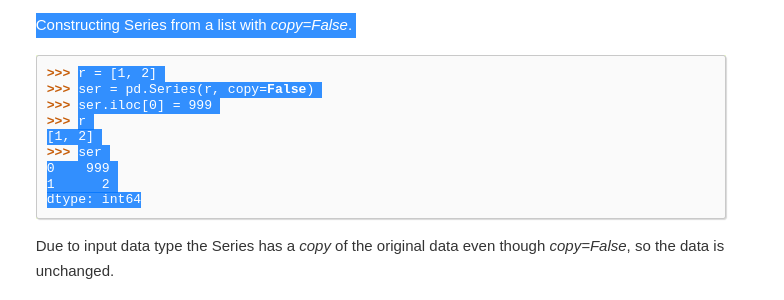

In [14]:
pred = []

for model in [rf_model,log_classifier,adaboost,knn]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
print(pred)

[0      0.98
1      0.03
2      0.98
3      0.94
4      0.54
       ... 
595    0.01
596    0.00
597    1.00
598    0.02
599    0.98
Length: 600, dtype: float64, 0      0.991861
1      0.000008
2      0.966929
3      0.761539
4      0.779443
         ...   
595    0.024239
596    0.000003
597    0.984385
598    0.001147
599    0.989540
Length: 600, dtype: float64, 0      0.559186
1      0.463282
2      0.538202
3      0.509875
4      0.490344
         ...   
595    0.461121
596    0.441377
597    0.532403
598    0.441720
599    0.559890
Length: 600, dtype: float64, 0      1.0
1      0.0
2      0.8
3      0.8
4      0.4
      ... 
595    0.0
596    0.0
597    1.0
598    0.2
599    0.8
Length: 600, dtype: float64]


In [15]:
## ROC-AUC-SCORE for all the 4 models in 4 columns

final_prediction = pd.concat(pred,axis=1)
final_prediction.columns  = ['RandomForest','LogisticRegression','AdaBoostClassifier','KNN']
final_prediction

,RandomForest,LogisticRegression,AdaBoostClassifier,KNN
0,0.98,0.991861,0.559186,1.0
1,0.03,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.94,0.761539,0.509875,0.8
4,0.54,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.00,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [16]:
## taking the mean of predictions made by all four models

final_prediction = final_prediction.mean(axis=1) 
final_prediction

0      0.882762
1      0.123323
2      0.821283
3      0.752853
4      0.552447
         ...   
595    0.123840
596    0.110345
597    0.879197
598    0.165717
599    0.832357
Length: 600, dtype: float64

In [17]:
print("SO combined test roc-auc: {}".format(roc_auc_score(y_test,final_prediction)))

SO combined test roc-auc: 0.9852444444444444


## Choosing the no. of threshold concept in below cell:
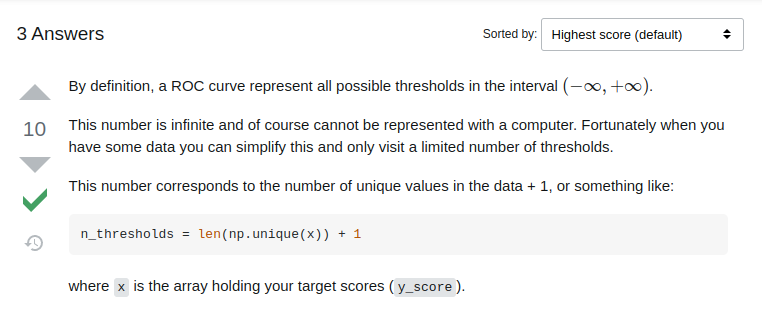

In [18]:
## Displaying the ROC-CURVE

fpr,tpr,thresholds = roc_curve(y_test,final_prediction)
thresholds

array([1.90938114, 0.90938114, 0.90217349, 0.90077475, 0.79631489,
       0.79412833, 0.79311406, 0.7930558 , 0.77492916, 0.77321156,
       0.73347083, 0.73287124, 0.72152563, 0.72137362, 0.70749037,
       0.70643711, 0.66037883, 0.65243537, 0.60646627, 0.59114346,
       0.5896569 , 0.58800386, 0.57558969, 0.56889283, 0.55042732,
       0.53219563, 0.51115858, 0.49116892, 0.4496034 , 0.41764281,
       0.41629719, 0.34745613, 0.34336612, 0.24217239, 0.24140421,
       0.2371341 , 0.23646893, 0.19916474, 0.19848417, 0.11795384,
       0.1178351 , 0.10625332])

In [19]:
fpr

array([0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.00666667, 0.00666667, 0.01      , 0.01      , 0.01333333,
       0.01333333, 0.01666667, 0.01666667, 0.02      , 0.02      ,
       0.02333333, 0.02333333, 0.02666667, 0.02666667, 0.03666667,
       0.03666667, 0.04      , 0.04      , 0.04333333, 0.04333333,
       0.05      , 0.05      , 0.05333333, 0.05333333, 0.07333333,
       0.07333333, 0.10666667, 0.10666667, 0.22666667, 0.22666667,
       0.23666667, 0.23666667, 0.31333333, 0.31333333, 0.79666667,
       0.79666667, 1.        ])

In [20]:
tpr

array([0.        , 0.00333333, 0.03666667, 0.03666667, 0.65      ,
       0.65      , 0.65666667, 0.65666667, 0.70666667, 0.70666667,
       0.81333333, 0.81333333, 0.84      , 0.84      , 0.86      ,
       0.86      , 0.9       , 0.9       , 0.92666667, 0.92666667,
       0.93      , 0.93      , 0.94666667, 0.94666667, 0.96      ,
       0.96      , 0.96666667, 0.96666667, 0.98      , 0.98      ,
       0.98333333, 0.98333333, 0.98666667, 0.98666667, 0.99      ,
       0.99      , 0.99333333, 0.99333333, 0.99666667, 0.99666667,
       1.        , 1.        ])

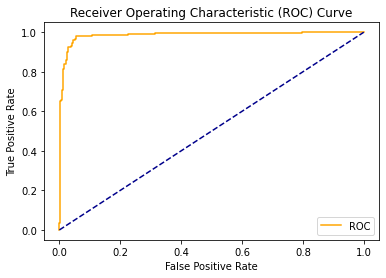

In [29]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [27]:
## getting the accuracy score for each threshold

from sklearn.metrics import accuracy_score

accuracy_list = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_list.append(accuracy_score(y_test, y_pred, normalize=True))
accuracy_list = pd.concat([pd.Series(thresholds),pd.Series(accuracy_list)],axis=1)
accuracy_list.columns = ['thresholds','accuracy']
accuracy_list.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_list.head(10)

,thresholds,accuracy
28,0.449603,0.961667
27,0.491169,0.958333
26,0.511159,0.956667
25,0.532196,0.956667
24,0.550427,0.956667
29,0.417643,0.955000
30,0.416297,0.953333
23,0.568893,0.953333
22,0.575590,0.951667
18,0.606466,0.948333
